# REEEM-DB - PLEXOS

<img src="http://reiner-lemoine-institut.de//wp-content/uploads/2015/09/rlilogo.png" width="100" style="float: right">

<img src="http://www.reeem.org/wp-content/uploads/2017/10/cropped-reeem-logo-transparent.png" width="300" style="float: right">


__copyright__ 	= "© Reiner Lemoine Institut" <br>
__license__ 	= "GNU Affero General Public License Version 3 (AGPL-3.0)" <br>
__url__ 		= "https://www.gnu.org/licenses/agpl-3.0.en.html" <br>
__author__ 		= "Ludwig Hülk"

# Import

In [19]:
# basic
import sys
import os
import getpass
import pandas as pd
import numpy as np
import json
import pathlib
from sqlalchemy import *
# plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objs as go
import plotly.offline as pltly
import colorlover as cl
import seaborn as sns
# notebook
from IPython.display import Image
from IPython.core.display import HTML 

pltly.init_notebook_mode(connected=True)
%matplotlib inline

version = 'v0.2.0'
project = 'REEEM'

# Database Connection

This function creates a database connection to the **reeem_db**.<br>
The default user is **reeem_vis**, a user that has only read rights.

This section establishes the database connection and asks for the **password**.<br>
The username can be changed in the corresponding function above.<br>
If you don't have a username or forgot your password please contact your database admins.

In [20]:
def reeem_session():
    """SQLAlchemy session object with valid connection to reeem database"""
    
    print('Please provide connection parameters to database:\n' +
              'Hit [Enter] to take defaults')
    host = '130.226.55.43' # input('host (default 130.226.55.43): ')
    port = '5432' # input('port (default 5432): ')
    database = 'reeem' # input("database name (default 'reeem'): ")
    user = 'reeem_vis' # input('user (default postgres): ')
    # password = input('password: ')
    password = getpass.getpass(prompt='password: ',
                                   stream=sys.stderr)
    con = create_engine(
            'postgresql://' + '%s:%s@%s:%s/%s' % (user,
                                                  password,
                                                  host,
                                                  port,
                                                  database)).connect()
    print('Password correct! Database connection established.')
    return con

con = reeem_session()

C:\Anaconda3\envs\reeem-vis\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

The `stream` parameter of `getpass.getpass` will have no effect when using ipykernel



Please provide connection parameters to database:
Hit [Enter] to take defaults
password: ········
Password correct! Database connection established.


# Table Info

In [21]:
# Database
schema = 'model_draft'
table_in = 'reeem_plexos_input'
table_out = 'reeem_plexos_output'
folder = 'plexos'

pathlib.Path('data/'+folder).mkdir(parents=True, exist_ok=True) 
print("Database Schema:", schema +'\n'+ "Input table:", table_in +'\n'+ 
      "Output table:", table_out +'\n'+ "Created folder:", folder )

Database Schema: model_draft
Input table: reeem_plexos_input
Output table: reeem_plexos_output
Created folder: plexos


## Database Query

This section is used to query the database tables (**table_in** and **table_out**).<br>

In [22]:
# Number of entries in table
sql = text("""
    SELECT  'In' AS data, count(*) AS count
    FROM    {0}.{1}
    UNION ALL
    SELECT  'Out' AS data, count(*) AS count
    FROM    {0}.{2}""".format(schema, table_in, table_out))
df_num = pd.read_sql_query(sql, con)
df_num

,data,count
0,In,235
1,Out,353


In [23]:
# Pathways
column = 'pathway' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3}; """.format(schema, table_in, table_out, column))
df_path = pd.read_sql_query(sql, con)
df_path

,data,pathway,count
0,In,Base,235
1,Out,Base,353


In [24]:
# Versions
column = 'pathway,version' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3}; """.format(schema, table_in, table_out, column))
df_ver = pd.read_sql_query(sql, con)
df_ver

,data,pathway,version,count
0,In,Base,DataV1,115
1,Out,Base,DataV1,178
2,In,Base,DataV2,120
3,Out,Base,DataV2,175


In [25]:
# Years
column = 'year' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3} ; """.format(schema, table_in, table_out, column))
df_year = pd.read_sql_query(sql, con)
df_year

,data,year,count
0,In,2030,235
1,Out,2030,353


In [26]:
# Regions
column = 'region' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3}
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}; """.format(schema, table_in, table_out, column))
df_reg = pd.read_sql_query(sql, con)
df_reg

,data,region,count
0,In,RO,47
1,In,BG,45
2,In,HR,47
3,In,HU,49
4,In,SI,47
5,Out,RO,70
6,Out,BG,64
7,Out,HR,70
8,Out,HU,76
9,Out,SI,73


In [27]:
# Categories
column = 'category' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}; """.format(schema, table_in, table_out, column))
df_cat = pd.read_sql_query(sql, con)
df_cat

,data,category,count
0,In,Fuel prices,50
1,In,None,5
2,In,demand extraction,10
3,In,Installed Generation Capacities,150
4,In,Electricity Exchange - Capacities,20
5,Out,Emissions,10
6,Out,Fuel Consumption,50
7,Out,Electricity Exchange - Import,31
8,Out,Electricity Exchange - Export,31
9,Out,Electricity Exchange - Net interchange,31


In [28]:
# Indicators
column = 'nid,category,indicator' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}
    ORDER BY category, indicator, nid; """.format(schema, table_in, table_out, column))
df_nind = pd.read_sql_query(sql, con)
df_nind.index.names = ['rid']
df_nind

,data,nid,category,indicator,count
rid,,,,,
0,In,1,demand extraction,Electricity Demand,10
1,In,20,Electricity Exchange - Capacities,BG,2
2,In,33,Electricity Exchange - Capacities,HR,4
3,In,31,Electricity Exchange - Capacities,HU,6
4,In,43,Electricity Exchange - Capacities,RO,4
5,In,45,Electricity Exchange - Capacities,SI,4
6,Out,55,Electricity Exchange - Export,BG,2
7,Out,68,Electricity Exchange - Export,HR,3
8,Out,66,Electricity Exchange - Export,HU,7


In [29]:
# Write data as CSV file
csvname = 'data/{0}/reeem_times_indicators.csv'.format(folder)
df_ind.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

Data saved to file: data/plexos/reeem_times_indicators.csv


## Table metadata

Access the metadata from the database tables and write metadata string as JSON file.<br>

In [31]:
# Input Metadata
sql = text("""SELECT obj_description('{0}.{1}'::regclass);""".format(schema, table_in))
meta_in = pd.read_sql_query(sql, con).loc[:,'obj_description'].iloc[0]
print(meta_in)

# Save data to JSON file
fname_in = 'data/{0}/{1}_metadata.json'.format(folder, table_in)
with open(fname_in, 'w') as metafile:
    json.dump(json.loads(meta_in), metafile, indent=4)
    print("Data saved to file:", fname_in)

{"title": "REEEM Plexos Input",
    "description": "none",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "BG, HR, HU, RO, SI",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2030",
        "start": "none",
        "end": "none",
        "resolution": "none"},
    "sources": [
        {"name": "REEEM Times PanEU", 
        "description": "Energy Consumption, Installed Capacities, Electricity Production, Heat Production, Fuel Input, Emissions, Mobility, Electricity Exchange", 
        "url": "tba", 
        "license": "Open Data Commons Attribution License 1.0 (ODC-BY-1.0)", 
        "copyright": "© Institut für Energiewirtschaft und Rationelle Energieanwendung (IER) der Universität Stuttgart"} ],
    "license":
        {"id": "CC-BY-4.0",
        "name": "Creative Commons Attribution 4.0 International",
        "version": "4.0",
        "url": "http://creativecommons.org/licenses/by/4.0/legalcode",
        "inst

In [32]:
# Output Metadata
sql = text("""SELECT obj_description('{0}.{1}'::regclass);""".format(schema, table_out))
meta_out = pd.read_sql_query(sql, con).loc[:,'obj_description'].iloc[0]
print(meta_out)

# Save data to JSON file
fname_out = 'data/{0}/{1}_metadata.json'.format(folder, table_out)
with open(fname_out, 'w') as metafile:
    json.dump(json.loads(meta_out), metafile, indent=4)
    print("Data saved to file:", fname_out)

{"title": "REEEM Plexos Input",
    "description": "none",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "BG, HR, HU, RO, SI",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2030",
        "start": "none",
        "end": "none",
        "resolution": "none"},
    "sources": [
        {"name": "PLEXOS® Integrated Energy Model", 
        "description": "Optimization model for long, medium and short-term energy market analysis.", 
        "url": "https://openenergy-platform.org/factsheets/models/152/", 
        "license": "none", 
        "copyright": "none"} ],
    "license":
        {"id": "CC-BY-4.0",
        "name": "Creative Commons Attribution 4.0 International",
        "version": "4.0",
        "url": "http://creativecommons.org/licenses/by/4.0/legalcode",
        "instruction": "You are free: To Share, To Create, To Adapt; As long as you: Attribute!",
        "copyright": "© Energy Institute Hrvoje Požar"

# View 3: One indicator for all regions in one pathway over time

## Database Query

This section can be used to query one specific **indicator** for all regions from one database table (_table_).<br>
Indicators are identified by the **nid** (_filter 1_).<br>
Only **region** _EU28_ is excluded (_filter 2_).<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_3**) and can be printed.

In [33]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, nid, schema, category, indicator, value, unit  -- column
    FROM    model_draft.reeem_plexos_input -- table
    WHERE nid = 1                                 -- filter 1
        AND pathway = 'Base'                      -- filter 2
        AND version = 'DataV1'                    -- filter 3
    ORDER BY pathway, version, region, year;      -- sorting """)
df_3 = pd.read_sql_query(sql, con)
#df_3

## Metadata

The important information from the above select (**df_3**) is collected in a Dictionary (**info_dict_3**).

In [35]:
# Facts dict
info_dict_3 = {}
info_dict_3['Filename'] = ['{0}_reeem_Plexos_allregions_{1}' .format(
    pd.to_datetime('today').strftime("%Y-%m-%d"),
    df_3.loc[:,'indicator'].unique()[0])]
info_dict_3['Category'] = df_3.loc[:,'category'].unique()
info_dict_3['Indicator'] = df_3.loc[:,'indicator'].unique()
info_dict_3['Unit'] = df_3.loc[:,'unit'].unique()
info_dict_3['Pathway'] = df_3.loc[:,'pathway'].unique()
info_dict_3['Year'] = df_3.loc[:,'year'].unique().tolist()
info_dict_3['Region'] = df_3.loc[:,'region'].unique()
info_dict_3['Y-Axis'] = ['{} in {}'.format(*info_dict_3['Indicator'], *info_dict_3['Unit'])]
info_dict_3['Title'] = ['{} in all regions'.format(*info_dict_3['Category'])]
info_dict_3['Metadata'] = meta_in

# Print facts
for x in info_dict_3:
    print(x,':',info_dict_3[x])

Filename : ['2018-11-05_reeem_Plexos_allregions_Electricity Demand']
Category : ['demand extraction ']
Indicator : ['Electricity Demand']
Unit : ['TWh']
Pathway : ['Base']
Year : [2030]
Region : ['BG' 'HR' 'HU' 'RO' 'SI']
Y-Axis : ['Electricity Demand in TWh']
Title : ['demand extraction  in all regions']
Metadata : {"title": "REEEM Plexos Input",
    "description": "none",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "BG, HR, HU, RO, SI",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2030",
        "start": "none",
        "end": "none",
        "resolution": "none"},
    "sources": [
        {"name": "REEEM Times PanEU", 
        "description": "Energy Consumption, Installed Capacities, Electricity Production, Heat Production, Fuel Input, Emissions, Mobility, Electricity Exchange", 
        "url": "tba", 
        "license": "Open Data Commons Attribution License 1.0 (ODC-BY-1.0)", 
        "copyright": "© I

## Stack data

This pivot function reorganises the data and makes each pathway a column. The year is used as the index.<br>
The result is saved to a new dataframe (**df_3p**) and can be printed.

In [36]:
# Reshape dataframe
df_3p = df_3.pivot(index='region', columns='indicator',  values='value')
#df_3p

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_3**. They can be exchanged with manual text.

(0, 53.59574977950043)

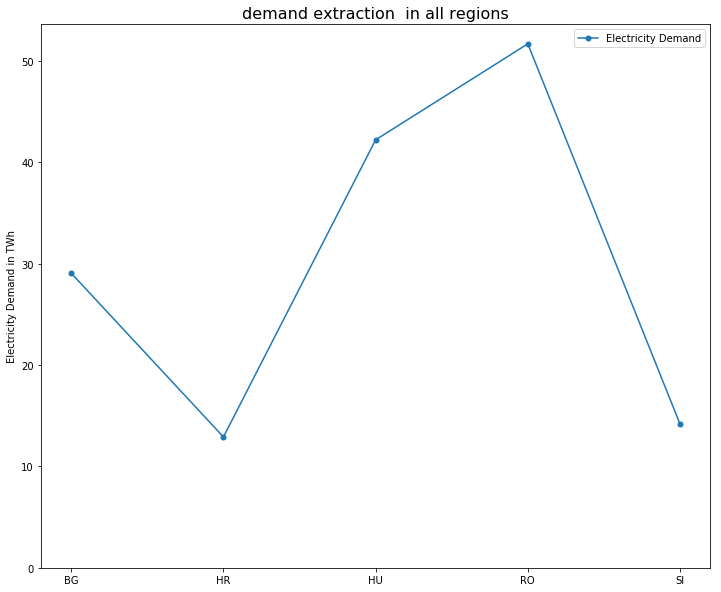

In [37]:
# Plot for one indicator and one pathway
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot()
# plt.title(r'CO2-Emissions in all regions', fontsize=16)  # Manual title
plt.title(*info_dict_3['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_3['Y-Axis'])                    # Label from info
plt.plot(df_3p, 
         marker="o",  markersize=5)
plt.legend(df_3p)
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.<br>
The different pathways can be switched on and off.

In [38]:
# Iterate over pathways and add to data
regions = df_3.loc[:,'region'].unique()
data = []
for region in regions:
    data.append(go.Scatter(
        x = df_3.loc[df_3['region'] == region].loc[:,'region'],
        y = df_3.loc[df_3['region'] == region].loc[:,'value'],
        name = region))

# Set layout
layout = go.Layout(
    height=800, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_3['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_3['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.<br>

In [ ]:
# Write facts to textfile
filename = ('data/{}.txt').format(*info_dict_3['Filename'])
with open(filename,'w') as tfile:
    for i in info_dict_3.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_3[i]]) + "\n")
tfile.close()
print("Facts saved to file:", filename)

# Save data to CSV
csvname = 'data/{}.csv' .format(*info_dict_3['Filename'])
df_3.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save pivot data to CSV
csvname = 'data/{}_pivot.csv' .format(*info_dict_3['Filename'])
df_3p.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save plot as file
plotname = 'data/{}.png' .format(*info_dict_3['Filename'])
fig.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot
htmlname = 'data/{}.html' .format(*info_dict_3['Filename'])
pltly.plot(ifig, filename=htmlname)
print("Interactive plot saved to file:", htmlname)

# View 4: All indicators for one region in one pathway over time

## Database Query

This section can be used to query all **indicators** for one **region** (_filter 2_) from one database table (_table_).<br>
Indicators are identified by the **nid**.<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_4**) and can be printed.

In [ ]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, nid, indicator, category, value, unit  -- column
    FROM    model_draft.reeem_plexos_input
    WHERE   category = 'Installed Generation Capacities'
        AND region = 'BG'
        AND pathway = 'Base'
        AND version = 'DataV1'
    ORDER BY pathway, version, year, region, nid; """)
df_4 = pd.read_sql_query(sql, con)
#print(df_4)

## Metadata

The important information from the above select (**df_4**) is collected in a Dictionary (**info_dict_4**).

In [ ]:
# Facts dict
info_dict_4 = {}
info_dict_4['Filename'] = ['{0}_reeem_Plexos_allindicators_{1}' .format(
    pd.to_datetime('today').strftime("%Y-%m-%d"),
    df_4.loc[:,'region'].unique()[0])]
info_dict_4['Category'] = df_4.loc[:,'category'].unique()
info_dict_4['Indicator'] = df_4.loc[:,'indicator'].unique()
info_dict_4['Unit'] = df_4.loc[:,'unit'].unique()
info_dict_4['Pathway'] = df_4.loc[:,'pathway'].unique()
info_dict_4['Year'] = df_4.loc[:,'year'].unique().tolist()
info_dict_4['Region'] = df_4.loc[:,'region'].unique()
info_dict_4['Y-Axis'] = ['{} in {}'.format(*info_dict_4['Category'],*info_dict_4['Unit'])]
info_dict_4['Title'] = ['{} in region {}'.format(*info_dict_4['Category'],*info_dict_4['Region'])]
info_dict_4['Metadata'] = df_meta

# Print facts
for x in info_dict_4:
    print(x,':',info_dict_4[x])

## Stack data

This pivot function reorganises the data and makes each year a column. The indicator is used as the index.<br>
The result is saved to a new dataframe (**df_4p**) and can be printed.

In [ ]:
# Reshape dataframe
df_4p = df_4.pivot(index='indicator', columns='region',  values='value')
#df_4p

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_4**. They can be exchanged with manual text.

In [ ]:
# Plot for one indicator and one pathway
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot()
# plt.title(r'All indicators in region {}', fontsize=16)   # Manual title
plt.title(*info_dict_4['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_4['Y-Axis'])                    # Label from info
plt.plot(df_4p, 
         marker="o",  markersize=5)
plt.legend(df_4p)
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.<br>
The different pathways can be switched on and off.

In [ ]:
# Iterate over pathways and add to data
indicators = df_4.loc[:,'indicator'].unique()
data = []
for indicator in indicators:
    data.append(go.Scatter(
        x = df_4.loc[df_4['indicator'] == indicator].loc[:,'region'],
        y = df_4.loc[df_4['indicator'] == indicator].loc[:,'value'],
        name = indicator))

# Set layout
layout = go.Layout(
    height=800, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_4['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_4['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.<br>

In [ ]:
# Write facts to textfile
filename = ('data/{}.txt').format(*info_dict_4['Filename'])
with open(filename,'w') as tfile:
    for i in info_dict_4.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_4[i]]) + "\n")
tfile.close()
print("Facts saved to file:", filename)

# Save data to CSV
csvname = 'data/{}.csv' .format(*info_dict_4['Filename'])
df_4.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save pivot data to CSV
csvname = 'data/{}_pivot.csv' .format(*info_dict_4['Filename'])
df_4p.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save plot as file
plotname = 'data/{}.png' .format(*info_dict_4['Filename'])
fig.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot
htmlname = 'data/{}.html' .format(*info_dict_4['Filename'])
pltly.plot(ifig, filename=htmlname)
print("Interactive plot saved to file:", htmlname)